<a href="https://colab.research.google.com/github/SamikshaBhavsar/Internship/blob/main/Internship_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
#load the dataset 

df = pd.read_csv("AC_Data(1).csv")

In [ ]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In [ ]:
#check the statistics 
df.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,43708.000000,43711.000000,43713.000000,43704.000000,43716.000000,43717.000000,43679.000000,43704.000000,43654.000000,43690.000000,43670.000000,43713.000000,43719.000000,43696.000000,43715.000000,43710.000000,43714.000000,43723.000000
mean,2.379368,3.868892,2.568411,2.395158,1.421699,2.518138,2.980883,2.548711,3.184382,1.538344,2.406141,2.699639,4.279893,2.917122,4.046283,2.800050,4.218979,6.462676
std,2.276782,2.545147,1.487508,1.797529,0.767218,1.655560,1.473498,1.504482,1.522291,0.685461,1.554481,1.436087,1.847168,1.454946,2.016898,1.606239,1.125491,2.319242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.123263,1.706508,1.258299,0.970744,1.543779,2.190803,1.766230,2.294635,1.117139,1.591748,1.949729,3.260674,1.852981,3.023501,1.877626,3.752478,4.013579
50%,2.094330,3.791752,2.486992,2.308961,1.380183,2.665063,3.005071,2.608551,3.082134,1.504554,2.351361,2.727152,4.217381,2.787084,4.001279,2.673698,4.611434,7.131194
75%,3.661752,5.460892,3.441527,3.476123,1.870234,3.616988,3.897857,3.496358,4.096374,1.963707,3.254937,3.566744,5.379832,3.824467,5.260193,3.695294,4.958306,8.314639
max,11.194789,11.147141,8.430909,9.879500,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,10.654430,5.950261,11.040031


In [ ]:
#fixing the data type for date column
df['Date']= pd.to_datetime(df['0'])
print(df['Date'].head())

0   2019-08-01 00:00:00
1   2019-08-01 00:01:00
2   2019-08-01 00:02:00
3   2019-08-01 00:03:00
4   2019-08-01 00:04:00
Name: Date, dtype: datetime64[ns]


In [ ]:
#making date as index
df.set_index(df['Date'],inplace=True)
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Date
Date,,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,2019-08-01 00:00:00
2019-08-01 00:01:00,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:01:00
2019-08-01 00:02:00,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,2019-08-01 00:02:00
2019-08-01 00:03:00,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 00:03:00
2019-08-01 00:04:00,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,2019-08-01 00:04:00


In [ ]:
#removing the unnecessary 
df.drop(['0','Date'],axis=1,inplace=True)


In [ ]:
#removing all rows with Nan values for all columns(ACs)

df.dropna(axis=0,how='all',inplace=True)
df.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [ ]:
#check the size of dataset now

df.shape

(51979, 18)

In [ ]:
# check for null value:

df.isnull().sum()

AC 1     8271
AC 2     8268
AC 3     8266
AC 4     8275
AC 5     8263
AC 6     8262
AC 7     8300
AC 8     8275
AC 9     8325
AC 10    8289
AC 11    8309
AC 12    8266
AC 13    8260
AC 14    8283
AC 15    8264
AC 16    8269
AC 17    8265
AC 18    8256
dtype: int64

null values handling (for ACs dataframe): Assuming each value in respective AC column refers to power consumed in watts each minute interval.

fill every null value with last non-null value as AC power consumption is usually constant for an hour period assuming temperature is constant

In [ ]:
df = df.fillna(method='bfill')

#check again for null value
df.isnull().sum()

AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

In [ ]:
#creating new feature for total power of all the AC's at a given time
df['Total']= df.sum(axis=1)
df['Total'].head()

Date
2019-08-01 00:00:00    65.393197
2019-08-01 00:02:00    64.762056
2019-08-01 00:04:00    65.791277
2019-08-01 00:06:00    63.779666
2019-08-01 00:08:00    61.997570
Name: Total, dtype: float64

As only Hourly temperature data was accesible to us, let's copy this data frame and resample it into Hourly frequancy data.

In [ ]:
df_min = df.copy()


In [ ]:
df_h = df.resample('H').sum()
df_h.head()


,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Total
Date,,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,205.245213,255.051086,54.055665,29.255579,66.960217,129.089322,80.320214,144.775203,109.584198,76.679951,49.562069,60.468362,140.845082,155.979765,169.555986,127.322558,78.980852,155.175165,2088.906487
2019-08-01 01:00:00,222.230520,253.772243,44.703934,55.266208,67.100296,129.442455,78.308407,133.896818,91.611631,79.768370,40.995962,56.617563,153.261319,170.970917,178.268818,138.366769,77.406406,119.129358,2091.117996
2019-08-01 02:00:00,220.526540,243.397378,44.469689,43.961705,59.740380,126.486130,82.591836,114.041240,93.468669,84.098961,45.848432,57.599295,121.038297,150.682456,186.419658,158.015012,82.047850,118.498018,2032.931547
2019-08-01 03:00:00,199.178419,237.699376,67.146196,43.220318,62.731445,142.045032,91.343533,116.870897,85.345919,81.955078,33.652736,50.129603,132.015538,151.033379,148.079304,150.045078,127.160931,116.948596,2036.601380
2019-08-01 04:00:00,197.929595,219.027004,52.349741,76.439507,56.164297,108.017994,87.555958,113.062609,101.495620,77.929729,36.199177,55.104092,119.186004,128.498585,159.703888,144.357490,125.760260,118.132559,1976.914107


# Q1: Identify patterns/trends in the data?

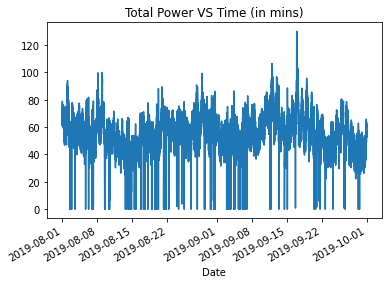

In [ ]:
#line chart: time(in mins)vs total power consumption
df_min['Total'].plot.line(title= 'Total Power VS Time (in mins)')

line plot of minute frequency data seems to immitate white noise, there are also very instance of zero or very low total power this can be attributed to many AC been switched off at same instance or power outage during those instances

let's plot hourly and daily frequency data as well to see what trend emerges on aggregrated basis.

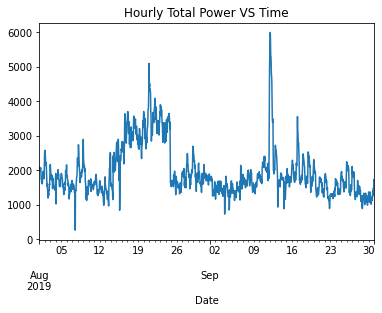

In [ ]:
#line chart: time vs hourly total power consumption
df_h['Total'].plot.line(title='Hourly Total Power VS Time')

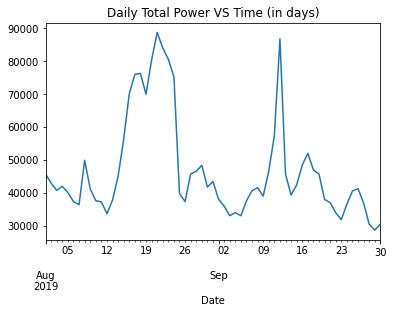

In [ ]:
#line chart: time vs daily total power consumption
df_d = df.resample('D').sum()
df_d['Total'].plot.line(title='Daily Total Power VS Time (in days)')

# Q2: Which AC was used the most/least?

In [ ]:
pw=df_min.iloc[:,0:-1].sum(axis=0)
print(pw)


AC 1     123255.475213
AC 2     200892.556669
AC 3     135751.411287
AC 4     127416.586069
AC 5      72323.277403
AC 6     124107.856938
AC 7     156137.939264
AC 8     131723.702373
AC 9     166571.250737
AC 10     79927.151923
AC 11    122137.124138
AC 12    136153.482776
AC 13    221349.514742
AC 14    150230.347499
AC 15    207642.687509
AC 16    146887.338077
AC 17    218109.610534
AC 18    336287.605156
dtype: float64


AC 5 AC 18


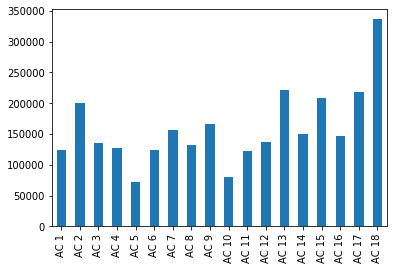

In [ ]:
#plotting the summation of power of all AC's
ax = pw.plot.bar()
print(pw.idxmin(),pw.idxmax())

Hence, AC 5 was used least, and AC 18 was used most

# Q4: Using the power data, predict/forecast the power consumption?

we will make use of Facebook's prophet library to make prediction both on our stationary data i.e. hourly frequency data as well as daily frequency data

Predictions of hourly power consumption by ACs in hotel

let's make predictions for the next 10 days

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

#let's make trainig dataset
col1= pd.Series(df_h.index, name='ds')
col2=pd.Series(df_h['Total'].values, name='y')

train = pd.concat([col1,col2],axis=1)
print(train.tail())

model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                      ds            y
1459 2019-09-30 19:00:00  1332.866198
1460 2019-09-30 20:00:00  1484.867963
1461 2019-09-30 21:00:00  1441.266326
1462 2019-09-30 22:00:00  1731.855844
1463 2019-09-30 23:00:00  1706.441444


In [ ]:
#let's define the forecasting periods i.e. 10 days in future
future = model.make_future_dataframe(periods=240, freq='H')
print(future.tail())

                      ds
1699 2019-10-10 19:00:00
1700 2019-10-10 20:00:00
1701 2019-10-10 21:00:00
1702 2019-10-10 22:00:00
1703 2019-10-10 23:00:00


In [ ]:
#make predicitons

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-01 00:00:00,2354.312715,1840.135205,2856.511030
1,2019-08-01 01:00:00,2331.809639,1798.840827,2884.694320
2,2019-08-01 02:00:00,2277.781695,1711.615533,2798.630726
3,2019-08-01 03:00:00,2239.306917,1710.795417,2755.513393
4,2019-08-01 04:00:00,2229.665572,1644.298968,2783.984270


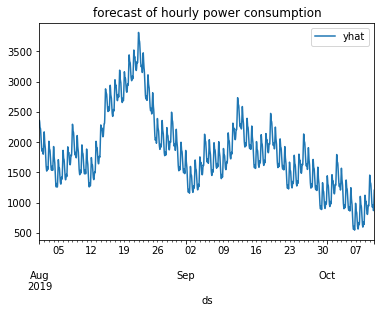

In [ ]:
forecast.plot.line(y='yhat',x='ds',title='forecast of hourly power consumption')

Predictions of daily power consumption by ACs in hotel

In [ ]:
model = Prophet()

#let's make trainig dataset
col1= pd.Series(df_d.index, name='ds')
col2=pd.Series(df_d['Total'].values, name='y')

train = pd.concat([col1,col2],axis=1)
print(train.tail())

model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


           ds             y
56 2019-09-26  41257.332107
57 2019-09-27  36872.243450
58 2019-09-28  30466.515886
59 2019-09-29  28691.295941
60 2019-09-30  30531.448230


In [ ]:
#let's define the forecasting periods i.e. 10 days in future
future = model.make_future_dataframe(periods=10)
print(future.tail())

           ds
66 2019-10-06
67 2019-10-07
68 2019-10-08
69 2019-10-09
70 2019-10-10


In [ ]:
#make predicitons

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-08-01,60439.627431,41140.708551,79186.215742
1,2019-08-02,54193.390921,36206.864511,72161.473975
2,2019-08-03,52611.052284,35025.993544,72411.274897
3,2019-08-04,48120.155155,30750.462377,68264.372586
4,2019-08-05,46673.104414,27910.522280,66378.118143


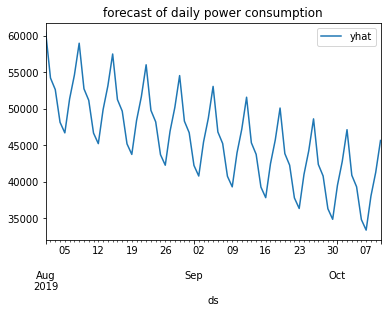

In [ ]:
forecast.plot.line(y='yhat',x='ds',title='forecast of daily power consumption')